# The Random Handout Problem - A Simulation
**Avy Faingezicht, 8/19/2018**

You can find me on my blog, [faingezicht.com](https://www.faingezicht.com) or on Twitter, as [@avyfain](https://www.twitter.com/avyfain)

The simulation below was inspired by a thought experiment by [Uri Wilensky](http://ccl.northwestern.edu/Uri.shtml), who studies agent based modeling at Northwestern University.
The question he poses is counterintuitive:

> Imagine a room full of 100 people with 100 dollars each. With every tick of the clock, every person with money gives a dollar to one randomly chosen other person. After some time progresses, how will the money be distributed?

Notice that it's not a 1-1 exchange on each random encounter but, instead, at every timestep people with cash hand out a dollar to a random person in the room. This notebook tries to give a quick way to compute and visualize the emerging behavior.

Think about it for a second before scrolling down to the gif below.

.

.

.

.

Thought about it? Cool. You probably thought the distribution would be roughly static. Well, nope.

**A few interesting things happen:**

* Due to the zero lower bound (ie, your wealth can't go negative), we end up with a skewed distribution. Some people end up with very little money, and others with a lot. This can be seen on the top chart, where we can see the overall distribution of the population.
* While there is some path dependence, and the rich tend to remain rich, there is significant cycling and if you run the simulation long enough the same individual is likely to move back and forth between the bottom and top ranks.

![Alt Text](random_encounters.gif)


### Credits
I first heard about this simulation from [Decision Science News](http://www.decisionsciencenews.com/2017/06/19/counterintuitive-problem-everyone-room-keeps-giving-dollars-random-others-youll-never-guess-happens-next/), and decided to reconstruct the simulation in Python. For a more in-depth look at the mathematic intuition behind the dynamics of this system, you can take a look at:

* [Statistical mechanics of money](http://physics.umd.edu/~yakovenk/papers/EPJB-17-723-2000.pdf) by Dragulescu and Yakovenko
* [When random people give money to random other people](https://quomodocumque.wordpress.com/about/) by Jordan S. Ellenberg

Additionally, I'd like to thank [Max Humber](http://maxhumber.com/) whose talk on [Amusing Algorithms](https://github.com/maxhumber/amusing_algorithms/blob/master/amusing_algorithms.ipynb) at PyBay pointed me to the super simple pattern to generate animations with `imageio` used below. I had thought about working on this for a while, and had found the animation APIs in `matplotlib` too clunky too be worth experimenting with.

### Code:

In [2]:
%matplotlib inline

In [3]:
import random
import time
import pathlib
import re
import imageio

import matplotlib.pyplot as plt
INITWEALTH = 50
NUMPLAYERS = 100
STEPS = 1000

In [4]:
def simulate():
    prev_step = [INITWEALTH]*NUMPLAYERS
    while True:
        # If a person has money to give away, subtract 1, otherwise, they stay at 0
        next_step = [max(0, player_wealth - 1) for player_wealth in prev_step]

        # Iterate on people's wealth at the previous step,
        # if they were at 0 skip them, otherwise randomly pick a person to give one of their dollars.
        for player, wealth in enumerate(prev_step):
            if wealth:
                next_step[random.randint(0, NUMPLAYERS - 1)] += 1
        yield next_step
        prev_step = next_step
        
def animate(i):
    bank_step = next(bank)
    ordered_bank_step = sorted(bank_step)
    for idx, (r1, r2) in enumerate(zip(p1, p2)):
        r1.set_height(ordered_bank_step[idx])
        r2.set_height(bank_step[idx])

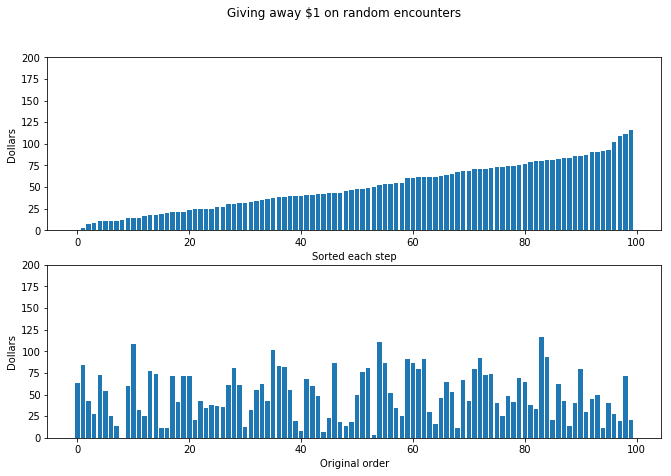

In [5]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11,7))
fig.suptitle("Giving away $1 on random encounters")

for ax in (ax1, ax2):
    ax.set_ylabel("Dollars")
    ax.set_ylim(0, 200)

ax1.set_xlabel("Sorted each step")
ax2.set_xlabel("Original order")

bank = simulate()
init_state = next(bank)
p1 = ax1.bar(range(NUMPLAYERS), init_state)
p2 = ax2.bar(range(NUMPLAYERS), init_state)

p = pathlib.Path('img/')
p.mkdir(parents=True, exist_ok=True)
        
for step in range(STEPS):
    animate(step)
    plt.savefig(p / f'{step}.png', dpi=72)

In [6]:
filenames = [str(x) for x in p.glob('*.png')]
filenames.sort(key=lambda x: int(re.sub('\D', '', x)))

with imageio.get_writer('random_encounters.gif', fps=60) as writer:
    for f in filenames:
        im = imageio.imread(f)
        writer.append_data(im)